In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('C:/Users/Paulo Roberto/Desktop/Customer Review.csv')
dados.head(1)

,ProductModelName,ProductCategory,ProductPrice,RetailerName,RetailerZip,RetailerCity,RetailerState,ProductOnSale,ManufacturerName,ManufacturerRebate,UserID,UserAge,UserGender,UserOccupation,ReviewRating,ReviewDate,ReviewText
0,Samsung TV 60 LED,TV,1100,Walmart,94102,San Francisco,CA,Yes,Samsung,No,hueii17,37,Female,Manager,5,12/14/2014,Great staff with the sale!! They did an extrao...


In [5]:
#Comentários dos clientes sobre os produtos
dados['ReviewText']

0       Great staff with the sale!! They did an extrao...
1        really like this Samsung Galaxy 4. i don't us...
2            The TV is great with superb picture quality.
3       Its easy to carry and is more than a tablet it...
4       Great laptop for the price. Does everything yo...
                              ...                        
1995    Great TV and a great price. Easy to set up. We...
1996    love it! I Love the I phone's best and easiest...
1997          The bluetooth didn't work with Bose headset
1998    The surface pro 3 is a pretty good tablet comp...
1999    Im very much impressed with the make and Perfo...
Name: ReviewText, Length: 2000, dtype: object

In [6]:
#Categorias dos produtos comentados
dados['ProductCategory'].value_counts()

TV             600
Tablet         600
Smart Phone    400
Laptop         400
Name: ProductCategory, dtype: int64

In [7]:
#Verificando se há valores ausentes
dados.isnull().sum()

ProductModelName      0
ProductCategory       0
ProductPrice          0
RetailerName          0
RetailerZip           0
RetailerCity          0
RetailerState         0
ProductOnSale         0
ManufacturerName      0
ManufacturerRebate    0
UserID                0
UserAge               0
UserGender            0
UserOccupation        0
ReviewRating          0
ReviewDate            0
ReviewText            0
dtype: int64

In [8]:
#verificando se há valores duplicados
dados['UserID'].duplicated().sum()

0

In [9]:
#Selecionando as informações necessária
dados1 = pd.concat([dados['ProductCategory'], dados['ReviewText']], axis = 1)
dados1

,ProductCategory,ReviewText
0,TV,Great staff with the sale!! They did an extrao...
1,Smart Phone,really like this Samsung Galaxy 4. i don't us...
2,TV,The TV is great with superb picture quality.
3,Tablet,Its easy to carry and is more than a tablet it...
4,Laptop,Great laptop for the price. Does everything yo...
...,...,...
1995,TV,Great TV and a great price. Easy to set up. We...
1996,Smart Phone,love it! I Love the I phone's best and easiest...
1997,Tablet,The bluetooth didn't work with Bose headset
1998,Tablet,The surface pro 3 is a pretty good tablet comp...


In [10]:
#enumerando as categorias
dados1['Id_categoria'] = dados1['ProductCategory'].factorize()[0]
dados1.head()

,ProductCategory,ReviewText,Id_categoria
0,TV,Great staff with the sale!! They did an extrao...,0
1,Smart Phone,really like this Samsung Galaxy 4. i don't us...,1
2,TV,The TV is great with superb picture quality.,0
3,Tablet,Its easy to carry and is more than a tablet it...,2
4,Laptop,Great laptop for the price. Does everything yo...,3


In [12]:
id_categoria = dados1['Id_categoria']
id_categoria.value_counts()

0    600
2    600
1    400
3    400
Name: Id_categoria, dtype: int64

In [13]:
dados1.groupby(['ProductCategory']).size()

ProductCategory
Laptop         400
Smart Phone    400
TV             600
Tablet         600
dtype: int64

<AxesSubplot: xlabel='ProductCategory'>

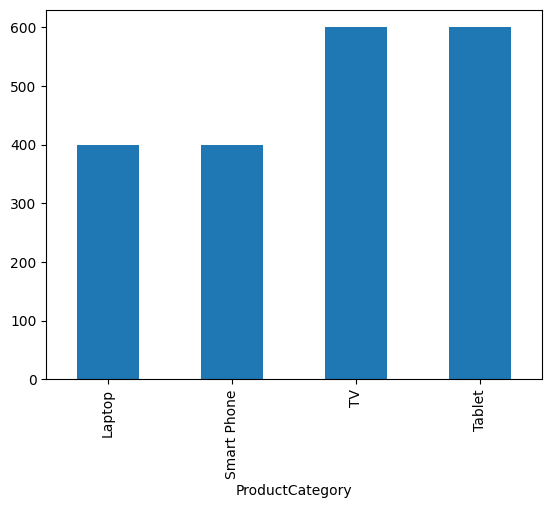

In [14]:
#vendo a distribuição dos produtos
dados1.groupby('ProductCategory').size().plot.bar()

In [31]:
#dividir o conjunto de dados entre treino e teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(dados['ReviewText'],
                                                       dados['ProductCategory'],
                                                       test_size = 0.3,
                                                       random_state = 0)
y_teste

405          Tablet
1190         Laptop
1132         Tablet
731              TV
1754    Smart Phone
           ...     
841              TV
108          Tablet
665              TV
1214         Laptop
2                TV
Name: ProductCategory, Length: 600, dtype: object

In [33]:
#Engenharia de atributos utilizando tf-idf
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

lb = LabelEncoder()
y_treino = lb.fit_transform(y_treino)
y_teste = lb.fit_transform(y_teste)

tfidf_vect = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w{1,}', max_features = 5000)
tfidf_vect.fit(dados1['ReviewText'])
x_treino_tfidf = tfidf_vect.transform(x_treino)
x_teste_tfidf = tfidf_vect.transform(x_teste)

In [34]:
#Construindo o modelo e avaliando
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x_treino_tfidf, y_treino)

LogisticRegression()

In [40]:
#Observando as previsões
previsao = modelo.predict(x_teste_tfidf)
previsao

array([3, 3, 3, 2, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 2, 1,
       3, 3, 2, 2, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 1, 0,
       2, 2, 1, 2, 2, 1, 1, 3, 2, 2, 1, 0, 1, 0, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 0, 2, 2, 3, 3,
       3, 1, 3, 3, 1, 2, 3, 3, 3, 3, 2, 0, 0, 1, 3, 2, 3, 0, 2, 1, 1, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 0, 3, 3, 3, 2, 2, 1, 1, 3, 3, 1, 0,
       2, 3, 2, 3, 2, 0, 0, 0, 3, 0, 0, 0, 1, 1, 2, 3, 0, 2, 1, 0, 3, 3,
       3, 3, 0, 2, 0, 2, 3, 3, 2, 3, 2, 2, 1, 3, 2, 3, 3, 2, 1, 1, 2, 3,
       2, 3, 3, 1, 3, 2, 3, 3, 0, 3, 1, 2, 2, 0, 2, 2, 0, 2, 3, 3, 2, 0,
       0, 0, 3, 2, 3, 0, 0, 3, 3, 2, 3, 2, 3, 3, 0, 3, 2, 3, 2, 2, 0, 3,
       2, 3, 3, 3, 1, 2, 2, 2, 0, 2, 0, 3, 0, 1, 2, 1, 2, 3, 0, 2, 3, 2,
       2, 0, 2, 2, 2, 3, 2, 0, 1, 1, 2, 2, 3, 2, 3, 0, 2, 3, 0, 3, 0, 1,
       0, 2, 0, 0, 3, 3, 3, 3, 2, 2, 0, 2, 3, 0, 2, 1, 0, 2, 1, 2, 2, 3,
       1, 3, 2, 0, 2, 2, 1, 3, 0, 2, 1, 1, 2, 0, 3,

In [36]:
#Verificando a precisão
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(previsao, y_teste)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.75


In [37]:
#Registros de classificação
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(y_teste, previsao, target_names = dados1['ProductCategory'].unique()))

              precision    recall  f1-score   support

          TV       0.80      0.60      0.69       133
 Smart Phone       0.93      0.76      0.84       117
      Tablet       0.80      0.82      0.81       180
      Laptop       0.61      0.79      0.69       170

    accuracy                           0.75       600
   macro avg       0.78      0.74      0.76       600
weighted avg       0.77      0.75      0.75       600



In [38]:
#Gerando uma matriz de confusão
confusao = confusion_matrix(y_teste, previsao)
confusao

array([[ 80,   2,  15,  36],
       [  4,  89,   3,  21],
       [  3,   1, 148,  28],
       [ 13,   4,  19, 134]], dtype=int64)

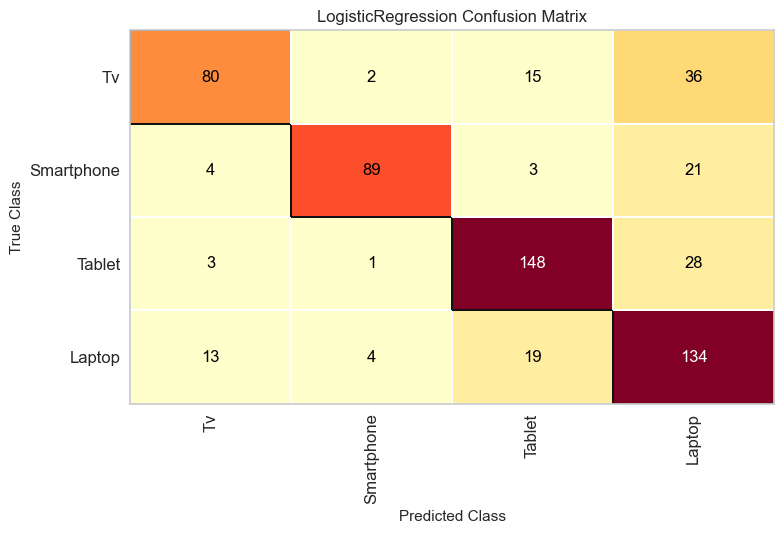

<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
#vizualizando a matriz de confusao
from yellowbrick.classifier import ConfusionMatrix
v = ConfusionMatrix(LogisticRegression(), 
                    classes = ['Tv', 'Smartphone', 'Tablet', 'Laptop'],
                   label_encoder = {0:'Tv', 1:'Smartphone', 2:'Tablet', 3: 'Laptop'})
v.fit(x_treino_tfidf, y_treino)
v.score(x_teste_tfidf, y_teste)
v.poof()

# Fim